<a href="https://colab.research.google.com/github/sarjakpatel/SecondHandCarPricePrediction/blob/main/Assignment%202/CMPE_257_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CMPE 257: Assignment 2 Cluster with GMM and one Other Algorithm 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

In [62]:
dataset = pd.read_csv('/content/drive/MyDrive/Dataset/vehicalesDataCleaned.csv', nrows=10000)
dataset.head(10)

,Unnamed: 0,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,lat,long
0,31,16,15000,2013.0,13,7074,0,6.0,2,128000.0,0,0,2,10,0,1,32.5920,-85.518900
1,32,16,27990,2012.0,14,14119,2,8.0,2,68696.0,0,2,0,8,0,1,32.5900,-85.480000
2,33,16,34590,2016.0,7,14355,2,6.0,2,29499.0,0,2,0,8,9,1,32.5900,-85.480000
3,34,16,35000,2019.0,38,15423,0,6.0,2,43000.0,0,0,0,10,5,1,32.6013,-85.443974
4,35,16,29990,2016.0,7,4510,2,6.0,2,17302.0,0,2,0,8,8,1,32.5900,-85.480000
5,36,16,38590,2011.0,7,4833,2,8.0,2,30237.0,0,2,2,7,8,1,32.5900,-85.480000
6,38,16,32990,2017.0,20,17073,2,6.0,2,30041.0,0,2,0,7,9,1,32.5900,-85.480000
7,39,16,24590,2017.0,7,14417,2,6.0,2,40784.0,0,2,0,8,10,1,32.5900,-85.480000
8,40,16,30990,2016.0,7,4506,2,6.0,4,34940.0,0,2,0,8,1,1,32.5900,-85.480000
9,41,16,27990,2014.0,38,15471,2,6.0,4,17805.0,0,2,0,8,8,1,32.5900,-85.480000


In [63]:
dataset = dataset.drop(['Unnamed: 0'], axis=1)

In [64]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        10000 non-null  int64  
 1   price         10000 non-null  int64  
 2   year          10000 non-null  float64
 3   manufacturer  10000 non-null  int64  
 4   model         10000 non-null  int64  
 5   condition     10000 non-null  int64  
 6   cylinders     10000 non-null  float64
 7   fuel          10000 non-null  int64  
 8   odometer      10000 non-null  float64
 9   title_status  10000 non-null  int64  
 10  transmission  10000 non-null  int64  
 11  drive         10000 non-null  int64  
 12  type          10000 non-null  int64  
 13  paint_color   10000 non-null  int64  
 14  state         10000 non-null  int64  
 15  lat           10000 non-null  float64
 16  long          10000 non-null  float64
dtypes: float64(5), int64(12)
memory usage: 1.3 MB


Reducing the dimensions of the data set using PCA.

In [65]:
from sklearn.decomposition import PCA

scaler =  StandardScaler()
scaler.fit(dataset)
scaled_data = scaler.transform(dataset)

pca = PCA(n_components = 2)
transformed_data = pca.fit_transform(scaled_data)
np.cumsum(pca.explained_variance_ratio_ * 100)

array([19.26570942, 33.1356637 ])

We can see that for 2 components only 33% of the variance is covered and we lose a lot of features.

## **KMeans Algorithm**

In [66]:
from sklearn.cluster import KMeans

In [67]:
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(dataset)
    distortions.append(km.inertia_)

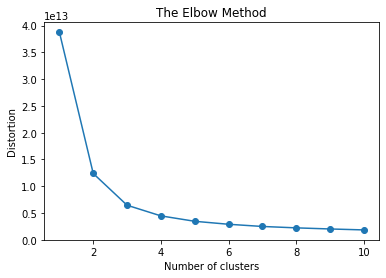

In [68]:
plt.plot(range(1, 11), distortions, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

Let's visualise for k = 3

In [69]:
kmeans = KMeans(n_clusters = 3)
y_predicted = kmeans.fit_predict(dataset)

Text(0, 0.5, 'PCA Feature 2')

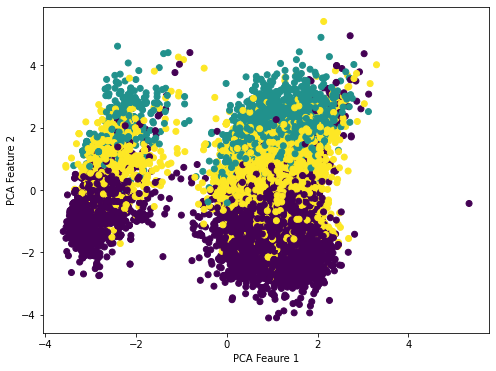

In [70]:
plt.figure(figsize=(8, 6))
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=y_predicted)
plt.xlabel('PCA Feaure 1')
plt.ylabel('PCA Feature 2')

## **Gaussian Mixture Model Algorithm**

In [71]:
from sklearn.mixture import GaussianMixture

In [72]:
gmm = GaussianMixture(n_components = 3).fit(dataset)
labels = gmm.predict(dataset)

Text(0, 0.5, 'PCA Feature 2')

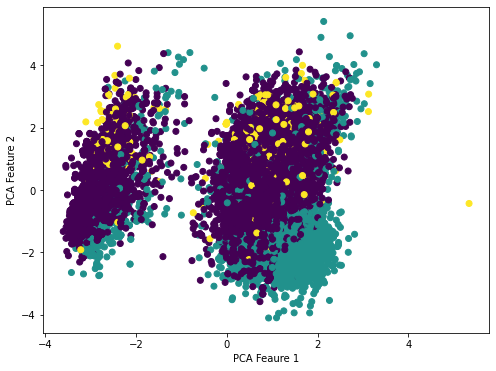

In [73]:
plt.figure(figsize=(8, 6))
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=labels)
plt.xlabel('PCA Feaure 1')
plt.ylabel('PCA Feature 2')

## **Spectral Clustering Algorithm**

In [74]:
from sklearn.cluster import SpectralClustering

In [75]:
spectral = SpectralClustering(
        n_clusters=3,
        eigen_solver="arpack",
        affinity="nearest_neighbors",
)

In [76]:
y_output = spectral.fit_predict(dataset)

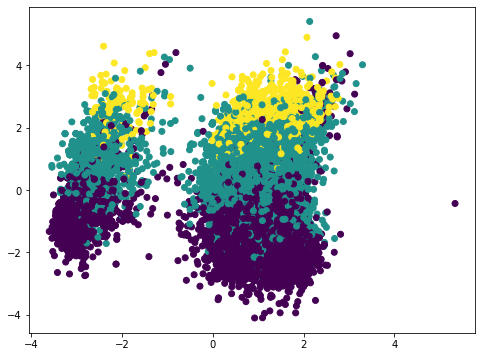

In [77]:
plt.figure(figsize=(8, 6))
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=y_output)

## **Birch Clustering Algorithm**

In [81]:
from sklearn.cluster import Birch

In [83]:
 birch = Birch(n_clusters=3)
 y_output = birch.fit_predict(dataset)

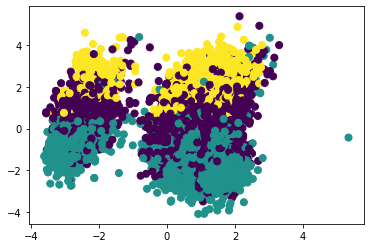

In [84]:
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=y_output, s=50, cmap='viridis')

**KMeans Clustering, Spectral Clustering, Birch Clustering are giving similar kind of result, and  we can somewhat clearly see 3 clusters but among these 3 clustering algorithms Spectral Cluster giving the best result. Also, Guassian Mixture Model Clustering not working properly as it gives more overlapped clusters in the selected dataset.**